# TECHNOHACKS EDUTECH

### Name : Prathmesh Jadhav

# Task 1 :  Perform data cleaning

### Objective : Clean a datatset by removing missing values and outliers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("titanic_train.csv")

In [4]:
df = df.set_index("PassengerId")

In [5]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
df['Initial'] = 0
for i in df:
    df['Initial'] = df.Name.str.extract('([A-Za-z]+)\.')

In [8]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [9]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [10]:
df.loc[(df.Age.isnull())&(df.Initial=='Mr'), 'Age'] = 33
df.loc[(df.Age.isnull())&(df.Initial=='Mrs'), 'Age'] = 36
df.loc[(df.Age.isnull())&(df.Initial=='Master'), 'Age'] = 5
df.loc[(df.Age.isnull())&(df.Initial=='Miss'), 'Age'] = 22
df.loc[(df.Age.isnull())&(df.Initial=='Other'), 'Age'] = 46

In [11]:
df = df.drop("Initial", axis=1)

In [12]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [13]:
df = df.drop("Cabin", axis=1)

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

## No any missing value present in the dataset now

<Axes: >

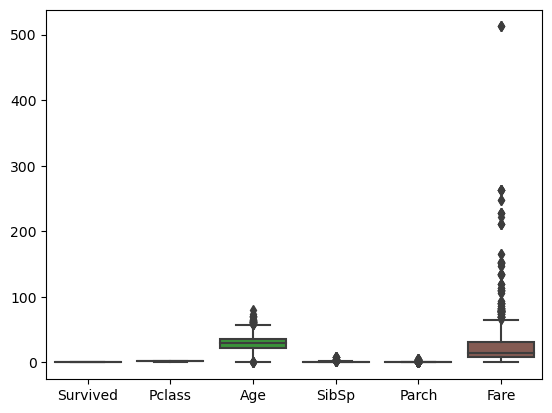

In [15]:
sns.boxplot(df)

In [16]:
for i in df:
    if df[i].dtypes in ("float64","int64"):
        q1 = df[i].quantile(0.25)  
        q3 = df[i].quantile(0.75) 
        iqr = q3-q1  
        ul = q3 + 1.5*iqr 
        ll = q1 - 1.5*iqr
        
        df[i].clip(lower=ll,upper=ul,inplace=True)

<Axes: >

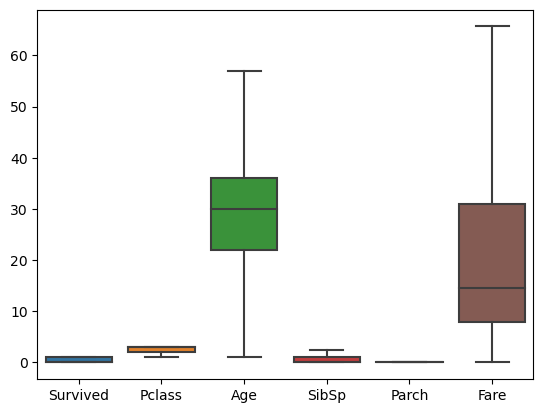

In [17]:
sns.boxplot(df)

## No any outlier present in the dataset now

## Here we cleaned the data by removing missing values and outliers.

## THANK YOU